In [63]:
import math
import numpy as np
import subprocess
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special

In [64]:
T = [5, 10, 20, 35, 50, 75, 100, 150, 200, 250, 500, 1000, 2000, 10000]
L = np.size(T)
dimx = 2000
dimt = 10000
range = np.arange(0, dimt + 1, 1)
x = np.zeros(dimx +1)
t = np.zeros((L, dimt +1))
#wave = np.zeros((L, dimt +1, dimx +1), complex)
sqnorm = np.zeros((L, dimt +1, dimx +1))



In [65]:
for ii, time in enumerate(T):
    output = subprocess.run(["./Ex1.out", "-s"], input="{} \n {} \n {} \n {} \n {} \n {} ".format(-10, 10, dimx, 0, time, dimt), 
                    stdout=subprocess.PIPE, encoding="utf-8")
    print(time, " run:")

    temp_data = np.genfromtxt("./Wavefunction(t).txt", delimiter=",", comments="#", dtype= complex)
    x[:] = temp_data[:]
    print(time, ": x")
    #wave[ii, :, :] = temp_data[1:, :] #Numerical Eigenvectors.
    t[ii, :] = np.genfromtxt("./time.txt", delimiter=",", comments="#")
    print(time, ": t")
    sqnorm[ii, :, :] = np.genfromtxt("./Squared_norm(t).txt", delimiter=",", comments="#")
    print(time, ": completed.")



5  run:


/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_54634/1708003200.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  x[:] = temp_data[:]


5 : x
5 : t
5 : completed.
10  run:
10 : x
10 : t
10 : completed.
20  run:
20 : x
20 : t
20 : completed.
35  run:
35 : x
35 : t
35 : completed.
50  run:
50 : x
50 : t
50 : completed.
75  run:
75 : x
75 : t
75 : completed.
100  run:
100 : x
100 : t
100 : completed.
150  run:
150 : x
150 : t
150 : completed.
200  run:
200 : x
200 : t
200 : completed.
250  run:
250 : x
250 : t
250 : completed.
500  run:
500 : x
500 : t
500 : completed.
1000  run:
1000 : x
1000 : t
1000 : completed.
2000  run:
2000 : x
2000 : t
2000 : completed.
10000  run:
10000 : x
10000 : t
10000 : completed.


In [66]:
avg_x = np.zeros((L, dimt + 1))

for jj, time in enumerate(T):
        for ii in range:
                avg_x[jj, ii] = np.sum(sqnorm[jj, ii, :] * x[:] * (x[2]-x[1]))


In [67]:
def plot_average_pos(avg, t):
     
    plt.figure(figsize=(10, 5))
    plt.title(f"Average position X(t) in [0, {t[-1]:.0f}]")
    plt.ylabel("X coordinate [a.u]")
    plt.xlabel("Time [a.u]")

    plt.plot(t, avg, 'b', marker='', label = f'Avg position vs time') #'#002FD0'
    plt.plot(t, t/t[-1], 'g', marker = '', linestyle = 'dashdot', label = f'minimum of the potential min(V(t))')

    plt.legend()
    plt.savefig(f'./Plots/Avgx[{t[0]:2.0f}, {t[-1]:2.0f}].png', bbox_inches="tight")
    plt.show()

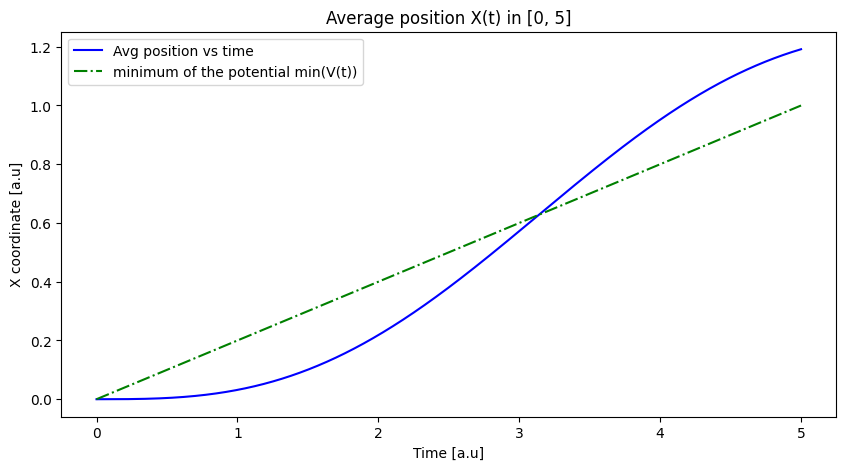

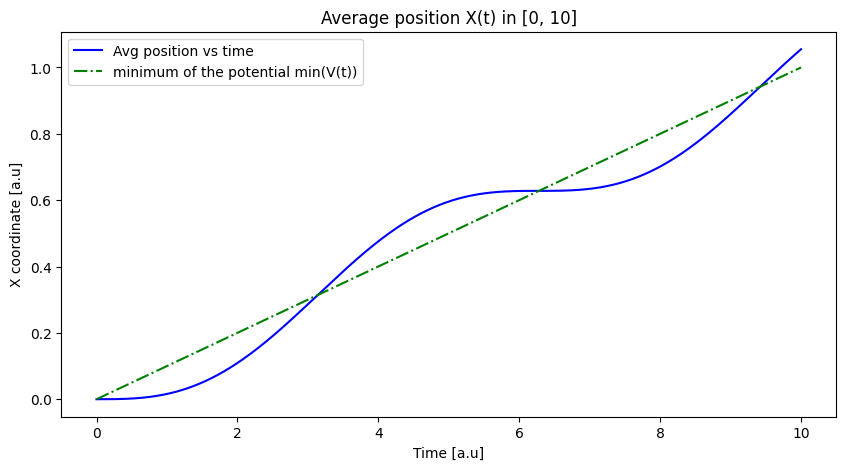

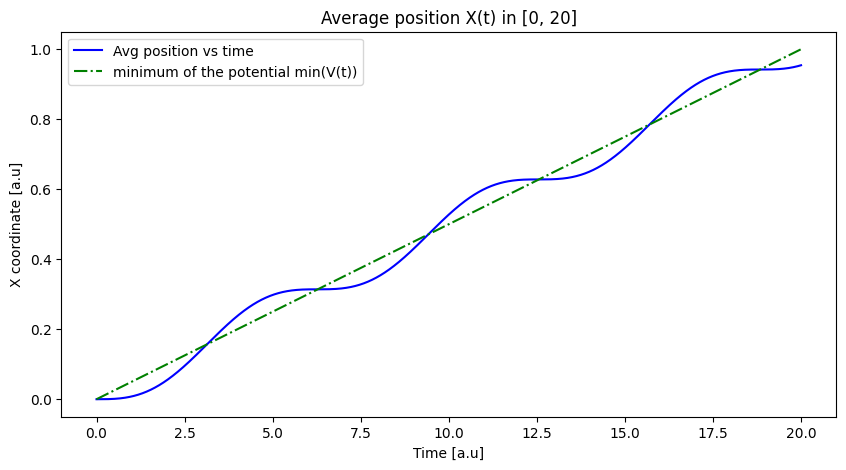

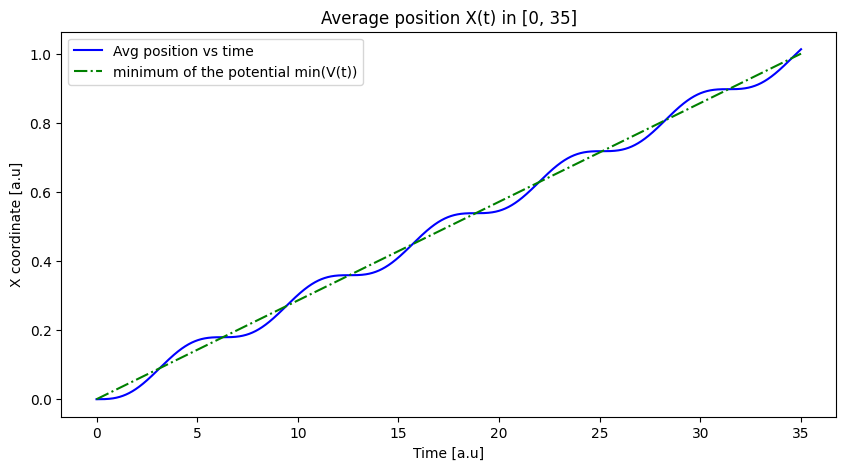

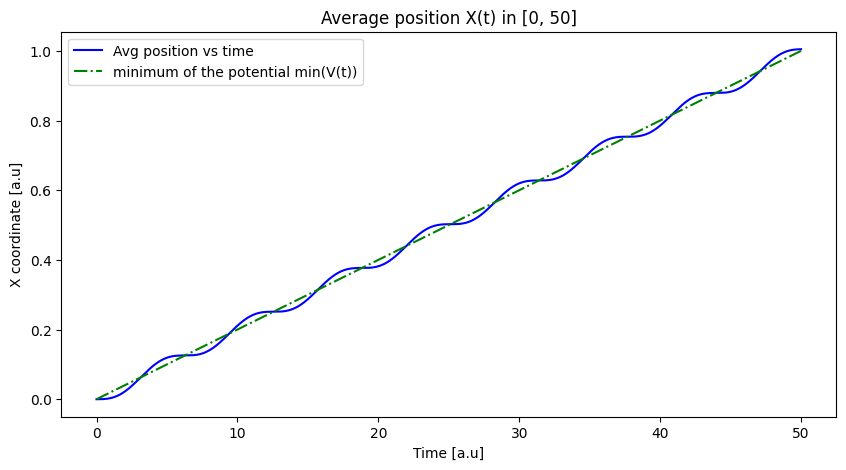

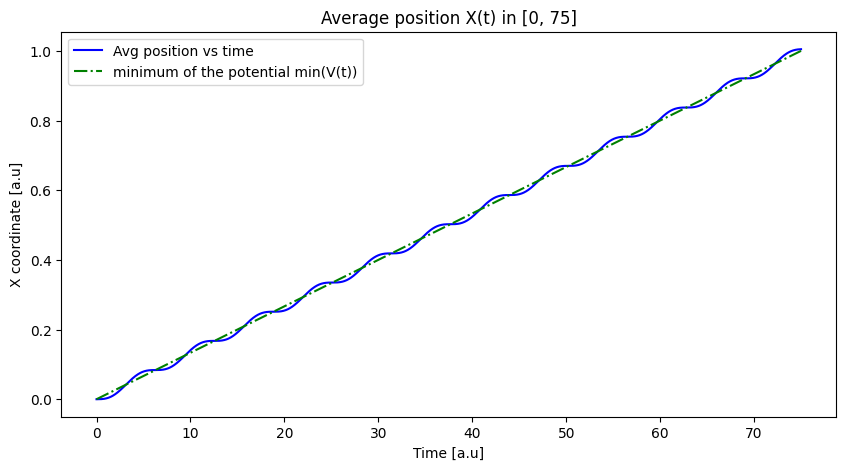

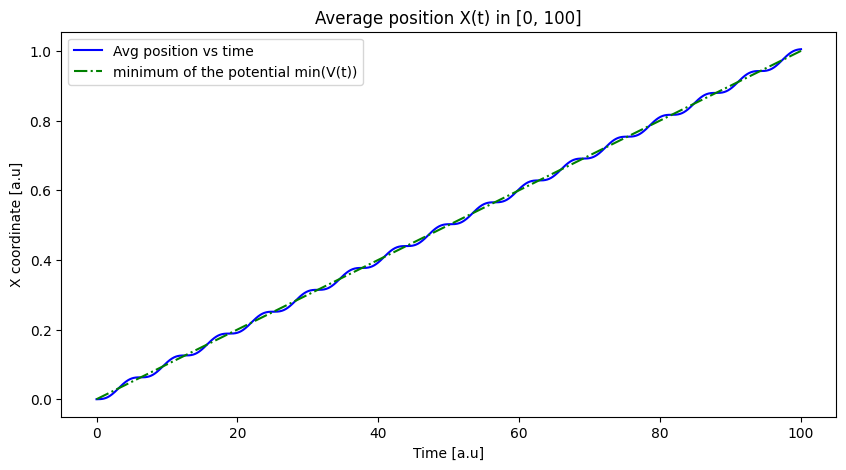

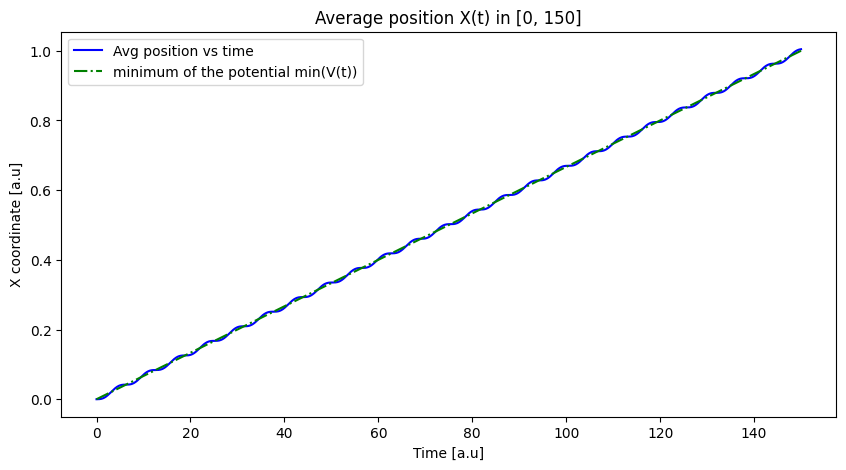

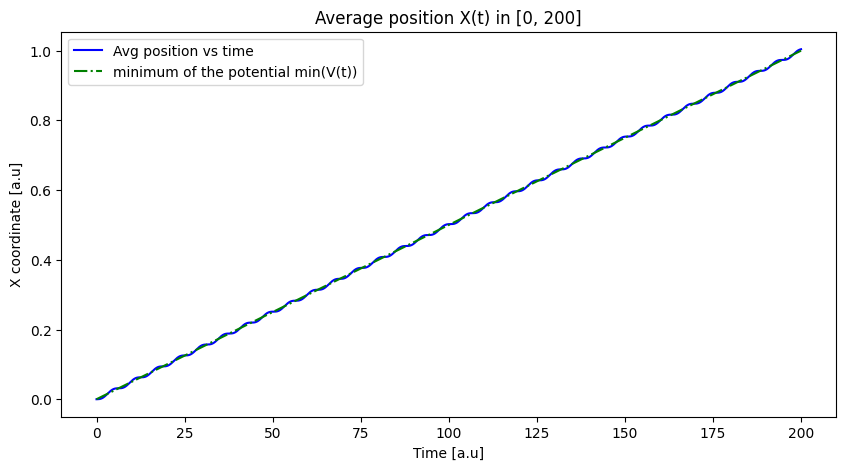

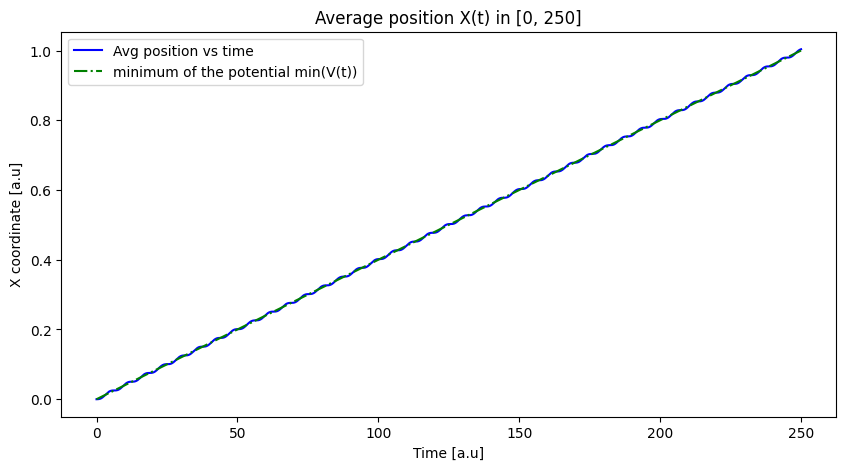

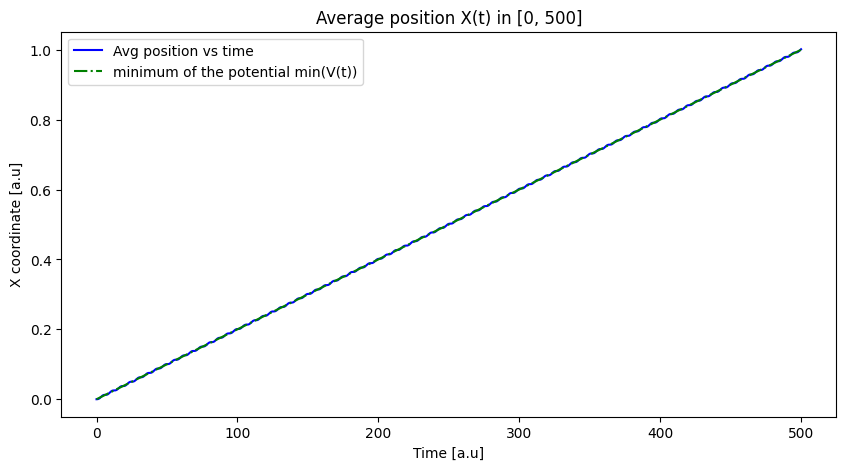

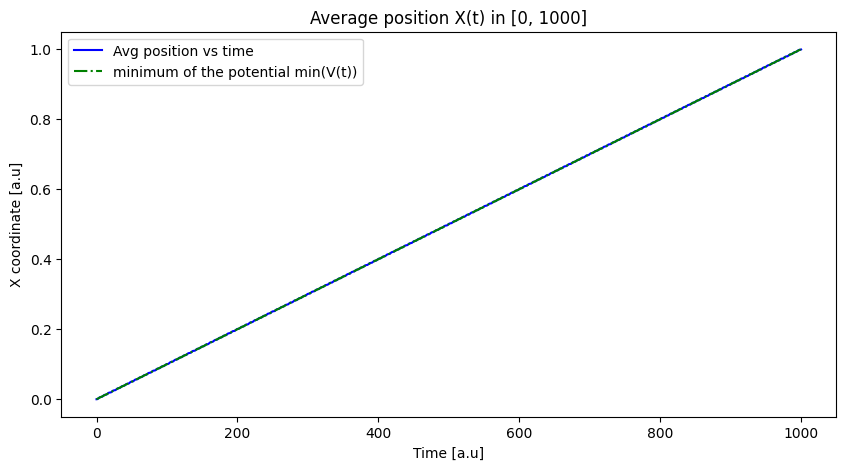

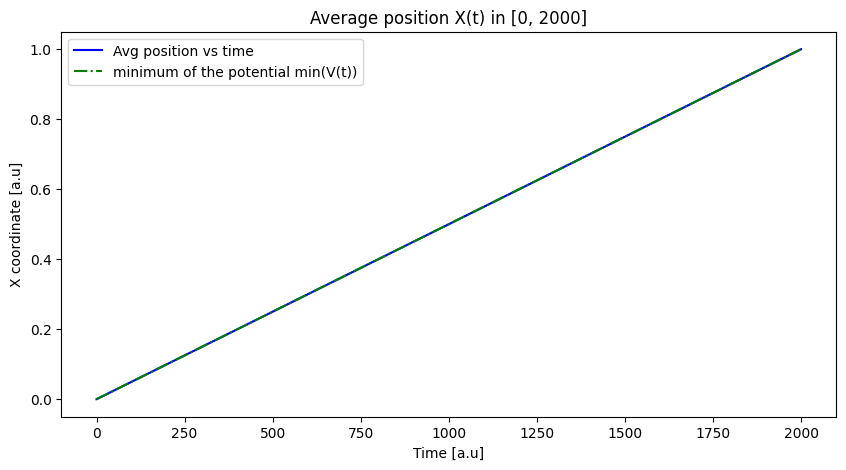

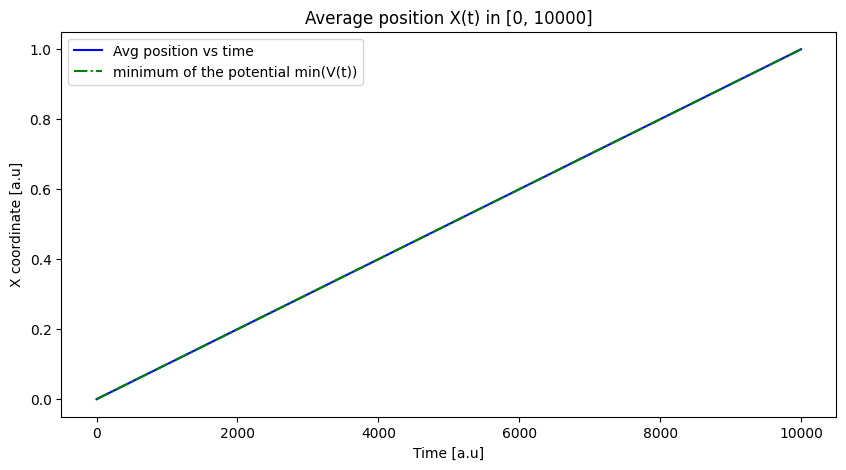

In [68]:
for jj, time in enumerate(T): 
    plot_average_pos(avg_x[jj], t[jj])

In [69]:
residue = np.zeros((L, dimt + 1))
for jj, time in enumerate(T):
    residue[jj] = avg_x[jj] - t[jj]/time

In [70]:
def sine(x, a, b, c):
        return a * np.sin(b * x + c)

In [71]:
popt = np.zeros((L, 3))
pcov = np.zeros((L, 3, 3))
err  = np.zeros((L, 3, 3))
for jj, time in enumerate(T):
    popt[jj], pcov[jj] = curve_fit(sine, t[jj], residue[jj], p0 = [1., 1., 0.])
    err[jj] = np.sqrt(pcov[jj])

/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_54634/1387952433.py:6: RuntimeWarning: invalid value encountered in sqrt
  err[jj] = np.sqrt(pcov[jj])


In [83]:
def plot_sine_residue(res, t, popt, err):
     
    plt.figure(figsize=(10, 5))
    plt.title(f"Residue for T = {t[-1]:.0f}")
    plt.ylabel("Residue [a.u]")
    plt.xlabel("Time [a.u]")

    plt.plot(t, res, 'b', marker='+', label = f'Avg position', linestyle = 'none', alpha = 0.5) #'#002FD0'
    plt.plot(t, sine(t, *popt), 'dodgerblue', label = r"$y = a \ sin(bx + c)$")
    plt.plot([], [], ' ', label=(f"a = {popt[0]:5.2f} \u00B1 {err[0, 0]:.1e}"))
    plt.plot([], [], ' ', label=(f"b = {popt[1]:5.2f} \u00B1 {err[1, 1]:.1e}"))
    plt.plot([], [], ' ', label=(f"c = {popt[2]:5.2f} \u00B1 {err[2, 2]:.1e}"))
    
      

    plt.legend()
    plt.savefig(f'./Plots/Res[{t[0]:2.0f}, {t[-1]:2.0f}].png', bbox_inches="tight")
    plt.show()

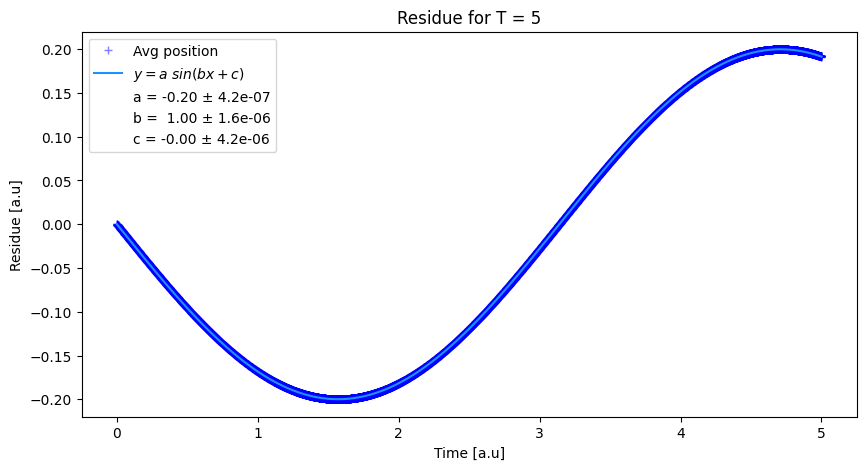

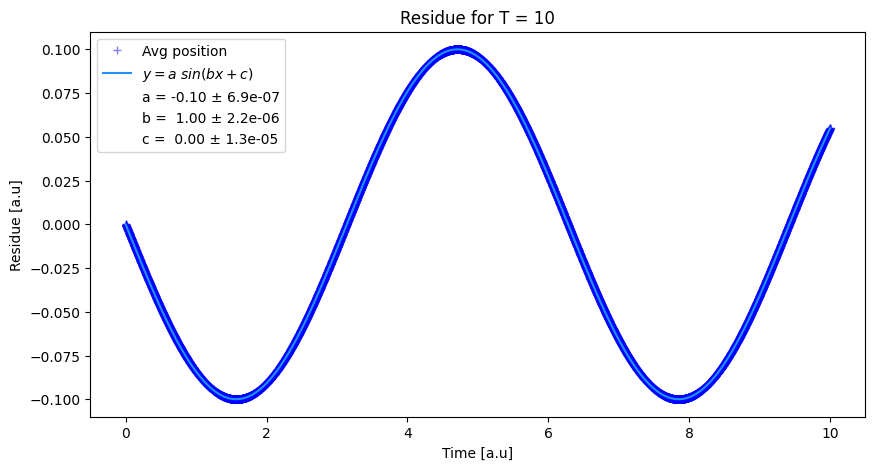

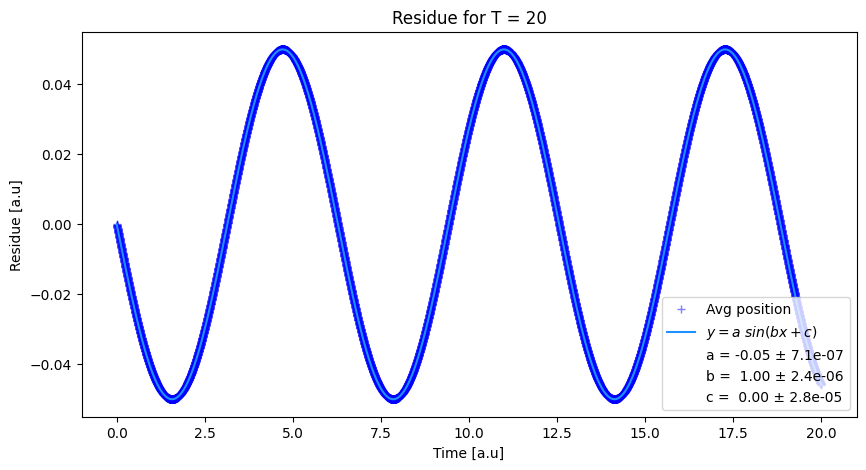

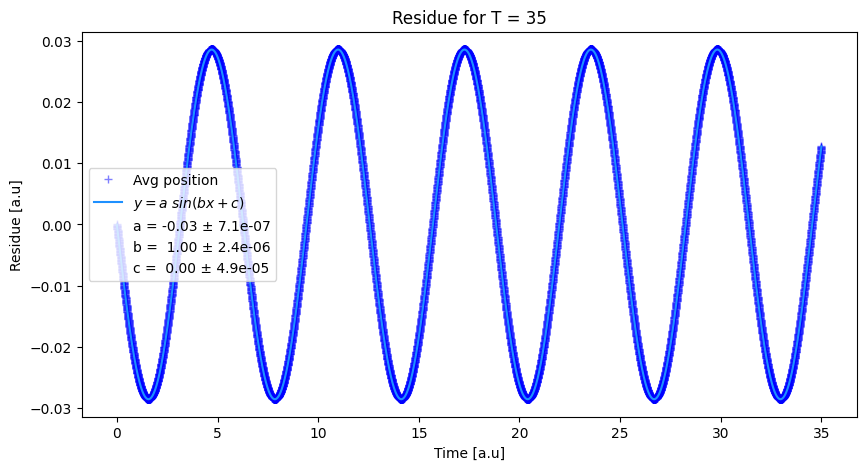

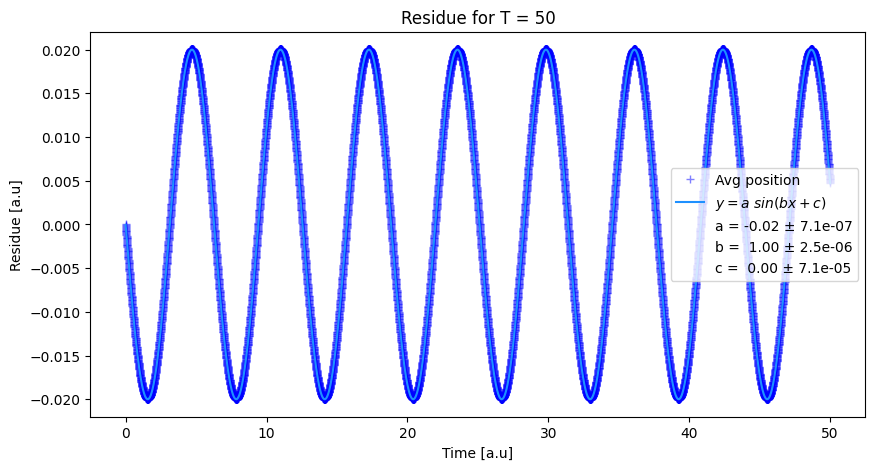

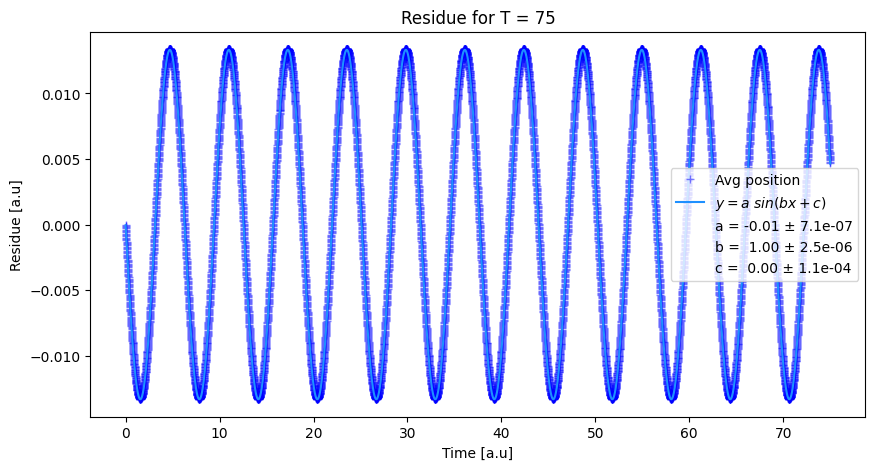

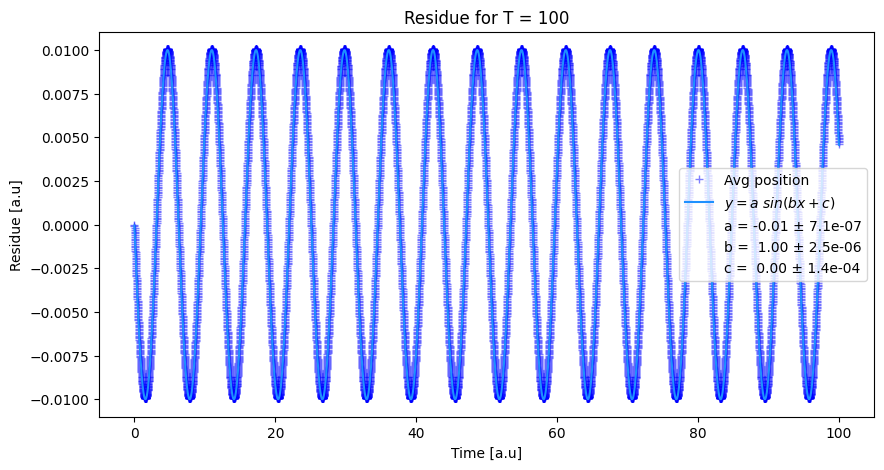

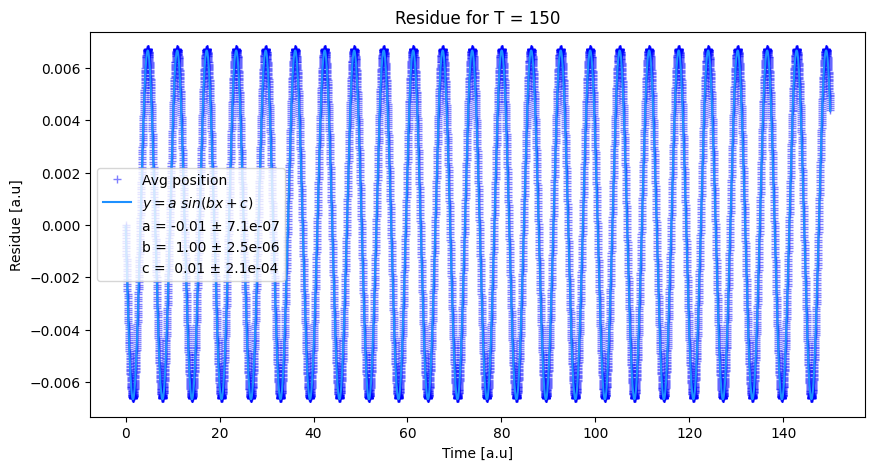

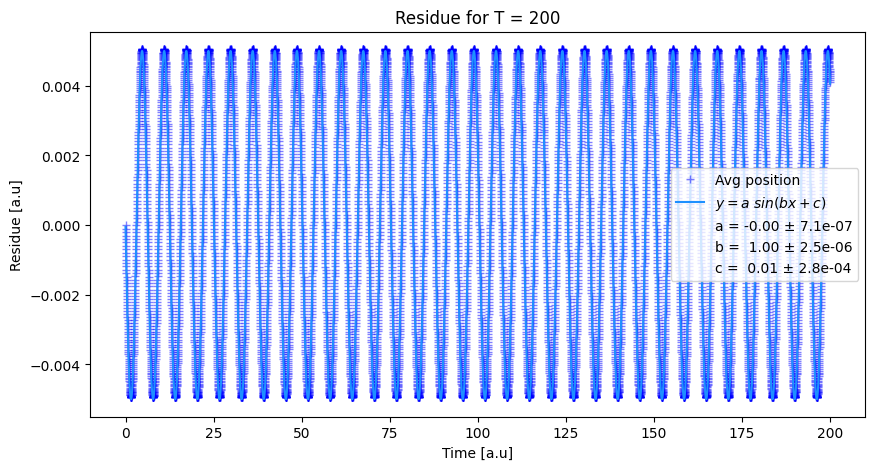

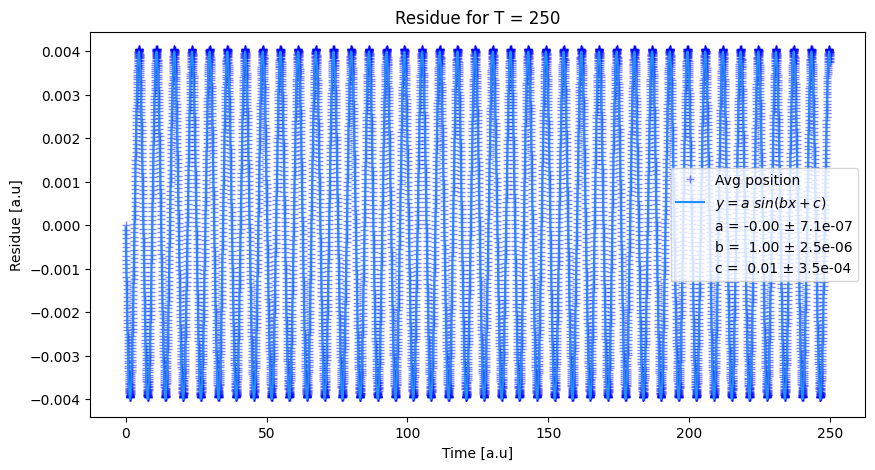

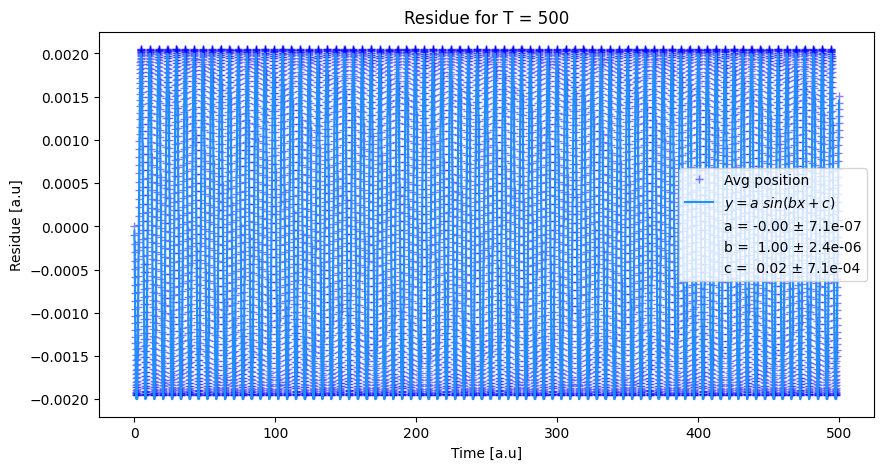

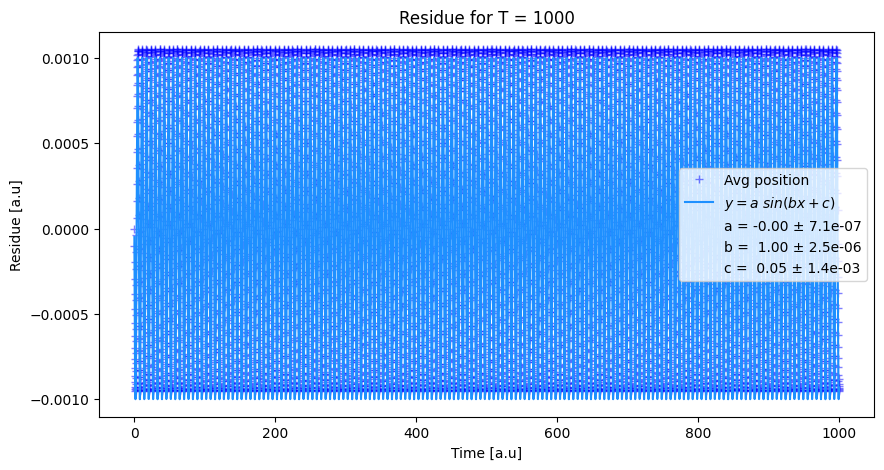

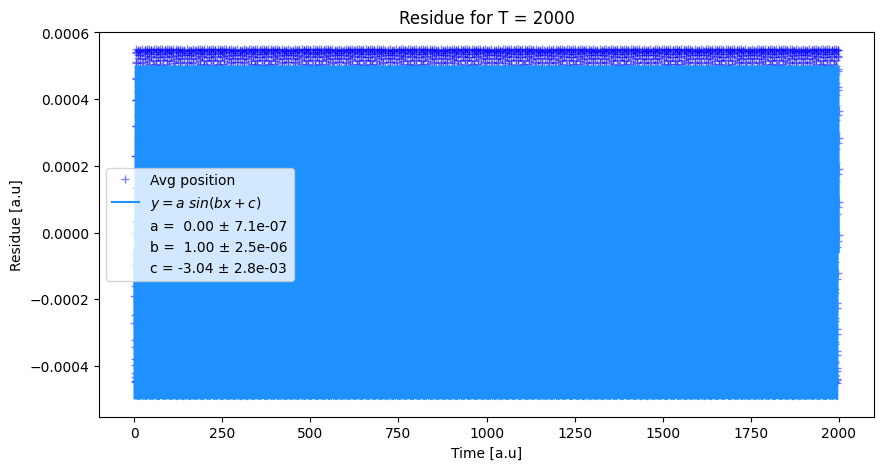

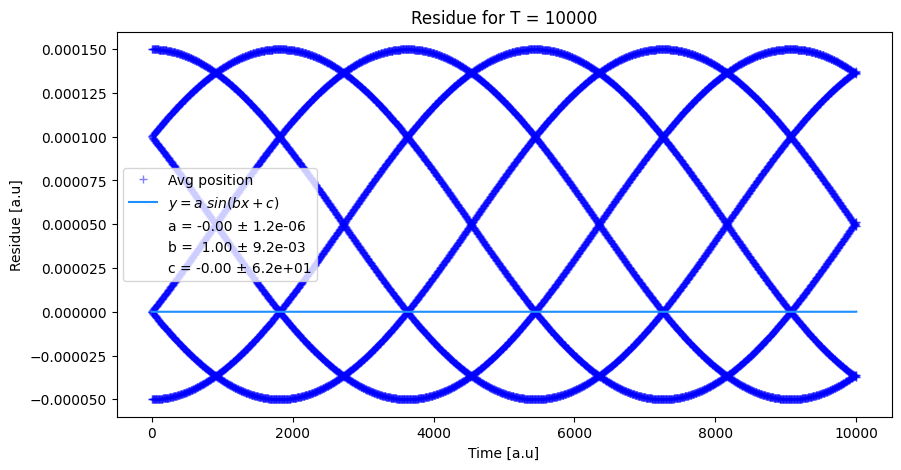

In [84]:
for jj, time in enumerate(T):
    plot_sine_residue(residue[jj], t[jj], popt[jj], err[jj])

In [74]:
def neg_inverse(x, a):
        return a / x

In [75]:

popt_inv, pcov_inv = curve_fit(neg_inverse,  T[:-3], popt[:-3, 0], p0 = [1.])
err_inv = np.sqrt(pcov_inv)

a_time = np.arange(5, T[-4], 1)

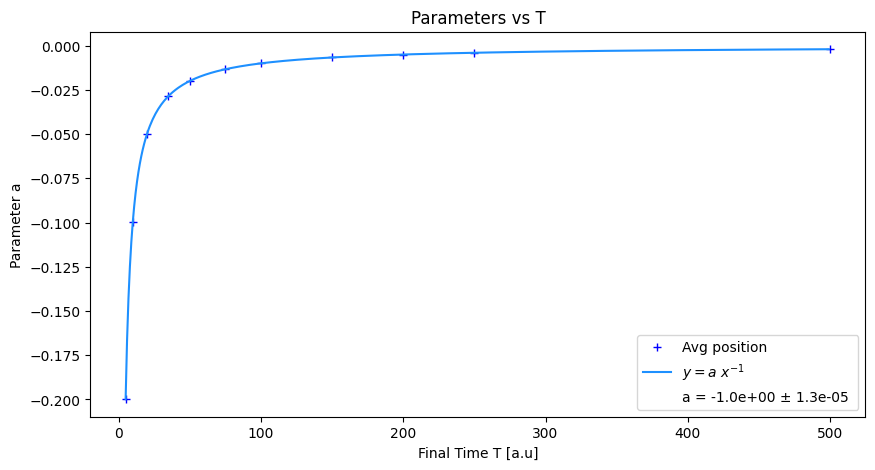

In [76]:
plt.figure(figsize=(10, 5))
plt.title("Parameters vs T")
    
plt.ylabel("Parameter a")
plt.xlabel("Final Time T [a.u]")
plt.plot(T[:-3], popt[:-3, 0], 'b', marker='+', label = f'Avg position', linestyle = 'none') #'#002FD0'
plt.plot(a_time, neg_inverse(a_time, popt_inv), 'dodgerblue', label = r"$y = a \ x^{-1}$")
plt.plot([], [], ' ', label=(f"a = {popt_inv[0]:.1e} \u00B1 {err_inv[0, 0]:.1e} "))

plt.legend()
plt.savefig(f'./Plots/Parameters.png', bbox_inches="tight")
plt.show()

In [77]:
max_wave = np.zeros((L, dimt + 1))
for jj, time in enumerate(T):
    for ii in range:
        max_wave[jj, ii] = np.argmax(sqnorm[jj, ii, :])

max_wave =  max_wave.astype(int)

In [78]:
def plot_squared_norm(sqnorm, x, t, maxwave):
    plt.figure(figsize=(10, 5))
    plt.title(r"Squared norm of the wave function: $|\Psi (x,t)|^2$")
    plt.imshow( sqnorm, origin="lower", extent=[x[0], x[-1], t[0], t[-1]], cmap="cool", aspect="auto")

    
    plt.plot(x[maxwave], t, 'b', marker='', label = f'Wavefunction maximum(t)')

    plt.xlim(-2, 3)
    plt.xticks(np.arange(-2, 3))
    plt.xlabel("X coordinate [a.u]")
    plt.ylabel("Time [a.u]")
    cbar = plt.colorbar(orientation='horizontal', fraction = 0.05)

    plt.legend()

    plt.savefig(f'./Plots/sqnorm(t)[{t[0]:2.0f}, {t[-1]:2.0f}].png', bbox_inches="tight")

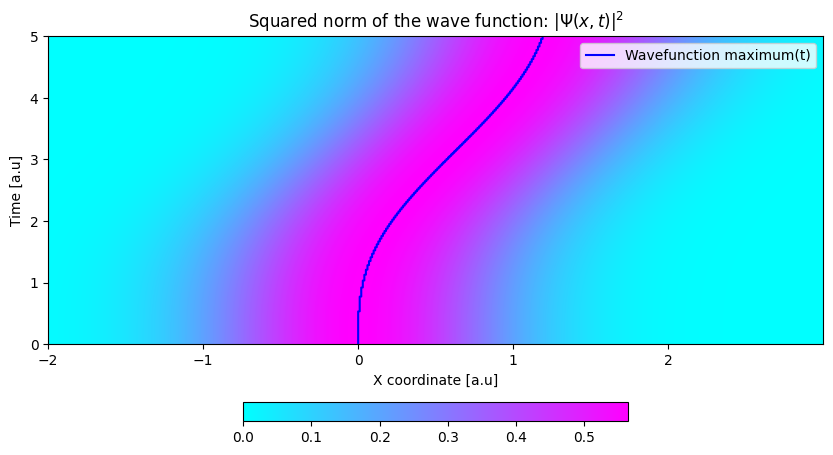

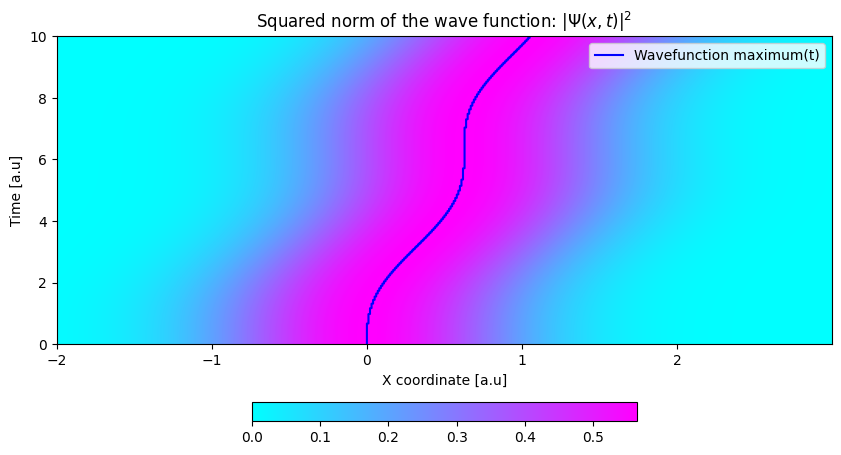

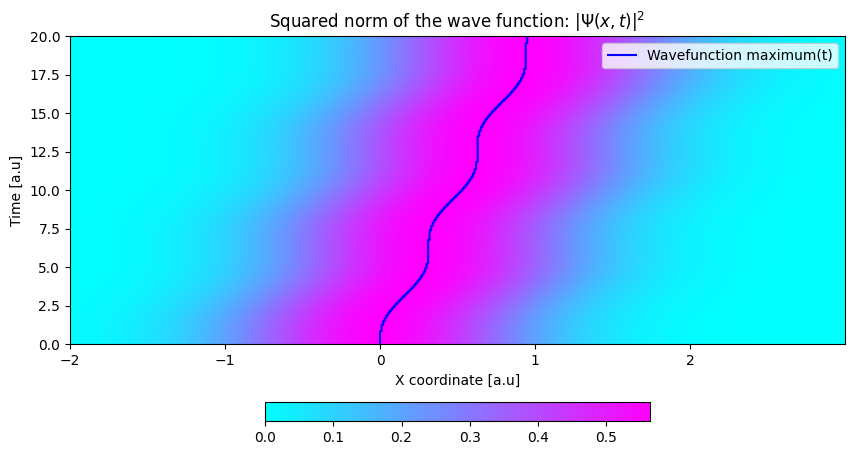

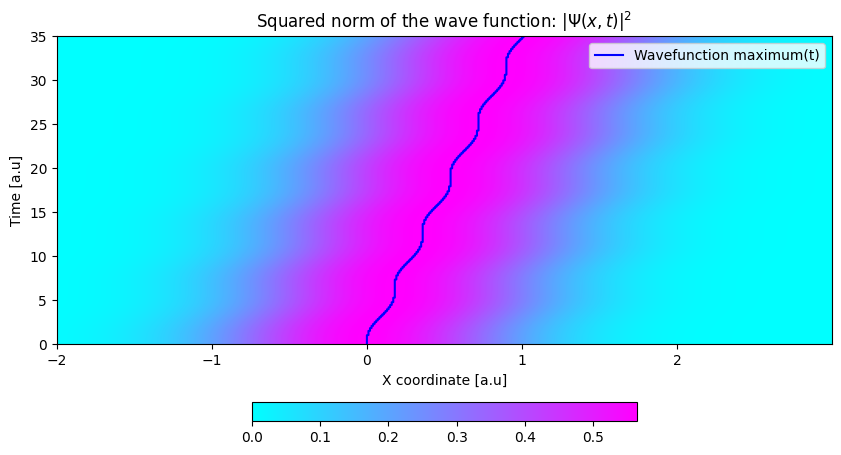

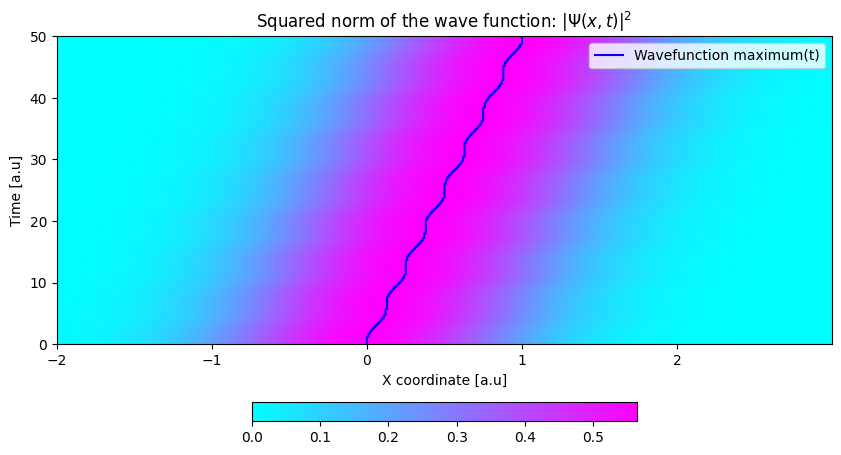

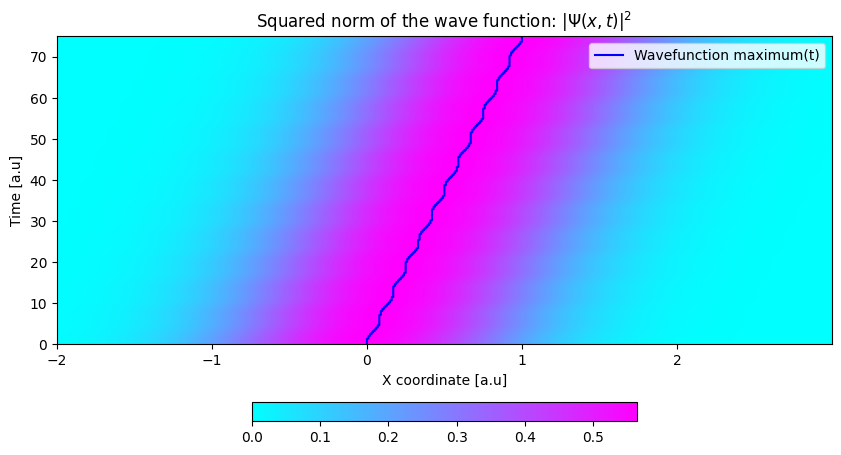

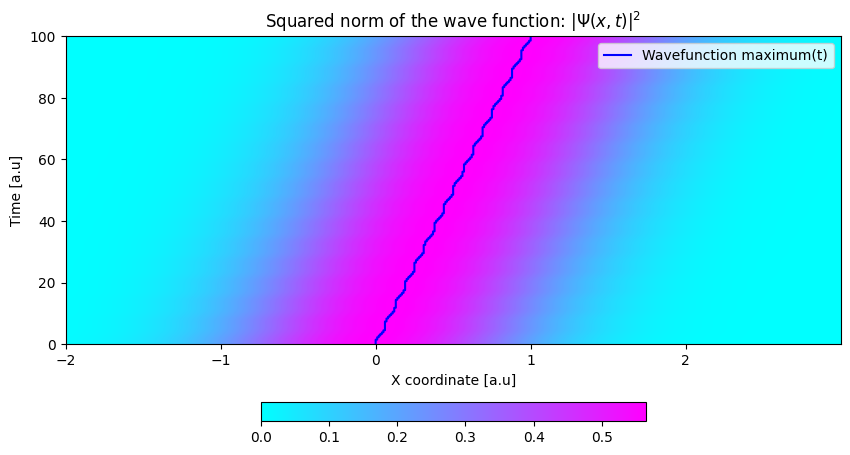

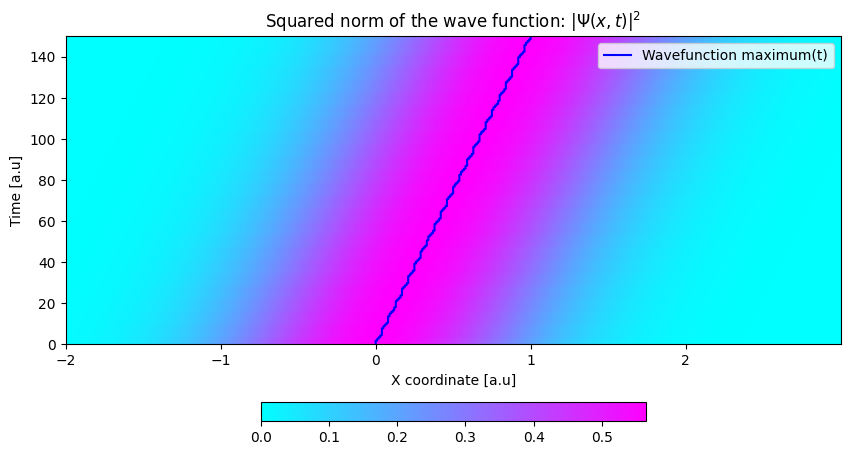

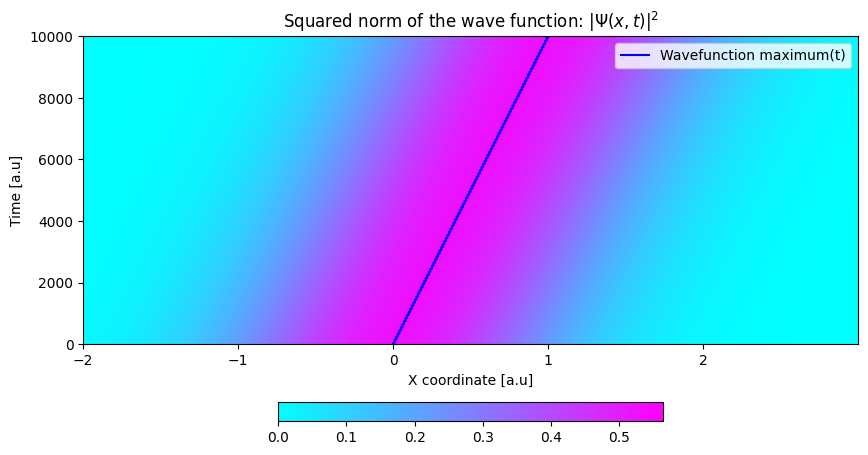

In [80]:
for jj, time in enumerate(T):
    if jj == 8:
        break
    plot_squared_norm(sqnorm[jj], x, t[jj], max_wave[jj])

plot_squared_norm(sqnorm[-1], x, t[-1], max_wave[-1])

    